# **Libraries**

In [824]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation

# **initial conditions**

In [826]:
m1 = 2
m2 = 1
m3 = 1
mass = (m1,m2,m3)

c = 1e3  #speed of light

# Position
position1 = [0.4, 1, 0] 
position2 = [1,  0,  0] 
position3 = [0.5,   0, 1] 

# Velocity
velocity1 = [0.5, 1 , -0.5]
velocity2 = [-0.6, 0 , 1]
velocity3 = [1, -0.5, 1]

initial_conditions = np.array([
    position1, position2, position3,
    velocity1, velocity2, velocity3
]).ravel()

# **Functions**

In [828]:
def classical_system(t, S, m1, m3, m2):
    r1, r2, r3 = S[0:3], S[3:6], S[6:9]
    dr1_dt, dr2_dt, dr3_dt = S[9:12], S[12:15], S[15:18]

    v1, v2, v3 = dr1_dt, dr2_dt, dr3_dt

    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)

    dv1_dt = m3*(r3 - r1)/r13**3 + m2*(r2 - r1)/r12**3
    dv2_dt = m3*(r3 - r2)/r23**3 + m1*(r1 - r2)/r12**3
    dv3_dt = m1*(r1 - r3)/r13**3 + m2*(r2 - r3)/r23**3

    return np.array([v1, v2, v3, dv1_dt, dv2_dt, dv3_dt]).ravel()

In [829]:
def relativistic_system(t, S, m1, m2, m3):
    r1, r2, r3 = S[0:3], S[3:6], S[6:9]
    dr1_dt, dr2_dt, dr3_dt = S[9:12], S[12:15], S[15:18]

    v1, v2, v3 = dr1_dt, dr2_dt, dr3_dt

    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)

    v12 = np.linalg.norm(v2 - v1)
    v13 = np.linalg.norm(v3 - v1)
    v23 = np.linalg.norm(v3 - v2)

    dv1_dt = m3 * (r3 - r1) / r13**3 + m2 * (r2 - r1) / r12**3
    dv2_dt = m3 * (r3 - r2) / r23**3 + m1 * (r1 - r2) / r12**3
    dv3_dt = m1 * (r1 - r3) / r13**3 + m2 * (r2 - r3) / r23**3

    dv1_dt_rel = dv1_dt * (
        1 + (v13**2 / c**2) - (4 * (m1 + m3) / (r13 * c**2))
        + (v12**2 / c**2) - (4 * (m1 + m2) / (r12 * c**2))
    )
    dv2_dt_rel = dv2_dt * (
        1 + (v23**2 / c**2) - (4 * (m2 + m3) / (r23 * c**2))
        + (v12**2 / c**2) - (4 * (m2 + m1) / (r12 * c**2))
    )
    dv3_dt_rel = dv3_dt * (
        1 + (v13**2 / c**2) - (4 * (m3 + m1) / (r13 * c**2))
        + (v23**2 / c**2) - (4 * (m3 + m2) / (r23 * c**2))
    )

    return np.array([v1, v2, v3, dv1_dt_rel, dv2_dt_rel, dv3_dt_rel]).ravel()

# **Results**

In [831]:
time_s, time_e = 0, 40
steps = np.linspace(time_s, time_e, 1001)  

# **Classical Results**

In [833]:
cla_solution = solve_ivp(
    fun=classical_system,
    t_span=(time_s, time_e),
    y0=initial_conditions,
    t_eval=steps,
    args=(m1, m2, m3)
)
cla_solution
time = cla_solution.t

In [834]:
p1x_cla = cla_solution.y[0]
p1y_cla = cla_solution.y[1]
p1z_cla = cla_solution.y[2]

p2x_cla = cla_solution.y[3]
p2y_cla = cla_solution.y[4]
p2z_cla = cla_solution.y[5]

p3x_cla = cla_solution.y[6]
p3y_cla = cla_solution.y[7]
p3z_cla = cla_solution.y[8]

In [835]:
rel_solution = solve_ivp(
    fun=relativistic_system,
    t_span=(time_s, time_e),
    y0=initial_conditions,
    t_eval=steps,
    args=(m1, m2, m3)
)
rel_solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.000e-02 ...  3.996e+01  4.000e+01]
        y: [[ 4.000e-01  4.203e-01 ...  1.461e+01  1.463e+01]
            [ 1.000e+00  1.039e+00 ...  1.466e+01  1.468e+01]
            ...
            [-5.000e-01 -4.732e-01 ...  6.119e-02  6.181e-02]
            [ 1.000e+00  9.438e-01 ... -2.849e-01 -2.943e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1142
     njev: 0
      nlu: 0

In [836]:
p1x_rel = rel_solution.y[0]
p1y_rel = rel_solution.y[1]
p1z_rel = rel_solution.y[2]

p2x_rel = rel_solution.y[3]
p2y_rel = rel_solution.y[4]
p2z_rel = rel_solution.y[5]

p3x_rel = rel_solution.y[6]
p3y_rel = rel_solution.y[7]
p3z_rel = rel_solution.y[8]

# **Plotting**

In [838]:
# fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

# body1, = ax.plot(p1x_cla, p1y_cla, p1z_cla, label='body 1', color = '#2aff1f' ,linestyle='--', linewidth=1)
# body2, = ax.plot(p2x_cla, p2y_cla, p2z_cla, label='body 2', color = '#fe151f' ,linestyle='--', linewidth=1)
# body3, = ax.plot(p3x_cla, p3y_cla, p3z_cla, label='body 3', color = '#2a92ed' ,linestyle='--', linewidth=1)

# body1_dot, = ax.plot([p1x_cla[-1]], [p1y_cla[-1]], [p1z_cla[-1]], 'o', color = '#2aff1f' , markersize=2)
# body2_dot, = ax.plot([p2x_cla[-1]], [p2y_cla[-1]], [p2z_cla[-1]], 'o', color = '#fe151f' , markersize=2)
# body3_dot, = ax.plot([p3x_cla[-1]], [p3y_cla[-1]], [p3z_cla[-1]], 'o', color = '#2a92ed' , markersize=2)

# ax.xaxis.pane.set_facecolor('black')
# ax.yaxis.pane.set_facecolor('white')
# ax.zaxis.pane.set_facecolor('grey')

# ax.set_title("Classical approach")
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")
# plt.grid()
# plt.legend()
# plt.savefig(f"Classical Three body {mass}.png",dpi=300)
# plt.show()

In [839]:
# fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

# body1, = ax.plot(p1x_rel, p1y_rel, p1z_rel, label='body 1', color = '#2aff1f' ,linestyle='--', linewidth=1)
# body2, = ax.plot(p2x_rel, p2y_rel, p2z_rel, label='body 2', color = '#fe151f' ,linestyle='--', linewidth=1)
# body3, = ax.plot(p3x_rel, p3y_rel, p3z_rel, label='body 3', color = '#2a92ed' ,linestyle='--', linewidth=1)

# body1_dot, = ax.plot([p1x_rel[-1]], [p1y_rel[-1]], [p1z_rel[-1]], 'o', color = '#2aff1f' , markersize=2)
# body2_dot, = ax.plot([p2x_rel[-1]], [p2y_rel[-1]], [p2z_rel[-1]], 'o', color = '#fe151f' , markersize=2)
# body3_dot, = ax.plot([p3x_rel[-1]], [p3y_rel[-1]], [p3z_rel[-1]], 'o', color = '#2a92ed' , markersize=2)

# ax.xaxis.pane.set_facecolor('black')
# ax.yaxis.pane.set_facecolor('white')
# ax.zaxis.pane.set_facecolor('grey')

# ax.set_title("Relativistic approach")
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")
# plt.grid()
# plt.legend()
# plt.savefig(f"Relativistic Three body {mass}.png",dpi=300)
# plt.show()

In [840]:
# def update(frame):
#     lower_lim = max(0, frame - 300)

#     x_current_1 = p1x_cla[lower_lim:frame+1]
#     y_current_1 = p1y_cla[lower_lim:frame+1]
#     z_current_1 = p1z_cla[lower_lim:frame+1]

#     x_current_2 = p2x_cla[lower_lim:frame+1]
#     y_current_2 = p2y_cla[lower_lim:frame+1]
#     z_current_2 = p2z_cla[lower_lim:frame+1]

#     x_current_3 = p3x_cla[lower_lim:frame+1]
#     y_current_3 = p3y_cla[lower_lim:frame+1]
#     z_current_3 = p3z_cla[lower_lim:frame+1]

#     body1.set_data(x_current_1, y_current_1)  
#     body1.set_3d_properties(z_current_1)

#     body1_dot.set_data([x_current_1[-1]], [y_current_1[-1]])
#     body1_dot.set_3d_properties([z_current_1[-1]])



#     body2.set_data(x_current_2, y_current_2)  
#     body2.set_3d_properties(z_current_2)

#     body2_dot.set_data([x_current_2[-1]], [y_current_2[-1]])
#     body2_dot.set_3d_properties([z_current_2[-1]])



#     body3.set_data(x_current_3, y_current_3)  
#     body3.set_3d_properties(z_current_3)

#     body3_dot.set_data([x_current_3[-1]], [y_current_3[-1]])
#     body3_dot.set_3d_properties([z_current_3[-1]])


#     return body1, body1_dot, body2, body2_dot, body3, body3_dot 

In [841]:
# animation = FuncAnimation(fig, update, frames=range(0, len(steps),2), interval=30, blit=True)
# animation.save(f"Classical Three body {mass}.gif", writer="pillow",fps=30 , dpi=300)

In [842]:
def update(frame):
    lower_lim = max(0, frame - 300)

    x_current_1 = p1x_rel[lower_lim:frame+1]
    y_current_1 = p1y_rel[lower_lim:frame+1]
    z_current_1 = p1z_rel[lower_lim:frame+1]

    x_current_2 = p2x_rel[lower_lim:frame+1]
    y_current_2 = p2y_rel[lower_lim:frame+1]
    z_current_2 = p2z_rel[lower_lim:frame+1]

    x_current_3 = p3x_rel[lower_lim:frame+1]
    y_current_3 = p3y_rel[lower_lim:frame+1]
    z_current_3 = p3z_rel[lower_lim:frame+1]

    body1.set_data(x_current_1, y_current_1)  
    body1.set_3d_properties(z_current_1)

    body1_dot.set_data([x_current_1[-1]], [y_current_1[-1]])
    body1_dot.set_3d_properties([z_current_1[-1]])



    body2.set_data(x_current_2, y_current_2)  
    body2.set_3d_properties(z_current_2)

    body2_dot.set_data([x_current_2[-1]], [y_current_2[-1]])
    body2_dot.set_3d_properties([z_current_2[-1]])



    body3.set_data(x_current_3, y_current_3)
    body3.set_3d_properties(z_current_3)

    body3_dot.set_data([x_current_3[-1]], [y_current_3[-1]])
    body3_dot.set_3d_properties([z_current_3[-1]])


    return body1, body1_dot, body2, body2_dot, body3, body3_dot 

In [843]:
# animation = FuncAnimation(fig, update, frames=range(0, len(steps),2), interval=30, blit=True)
# animation.save(f"Relativistic Three body {mass}.gif", writer="pillow",fps=30 , dpi=300)

In [844]:
# fig = plt.figure(figsize=(14, 6))

# # Classical Plot
# ax1 = fig.add_subplot(121, projection='3d')
# ax1.plot(p1x_cla, p1y_cla, p1z_cla, label='Body 1', color='#2aff1f', linestyle='--', linewidth=1)
# ax1.plot(p2x_cla, p2y_cla, p2z_cla, label='Body 2', color='#fe151f', linestyle='--', linewidth=1)
# ax1.plot(p3x_cla, p3y_cla, p3z_cla, label='Body 3', color='#2a92ed', linestyle='--', linewidth=1)
# ax1.plot([p1x_cla[-1]], [p1y_cla[-1]], [p1z_cla[-1]], 'o', color='green', label='Body 1 Final', markersize=5)
# ax1.plot([p2x_cla[-1]], [p2y_cla[-1]], [p2z_cla[-1]], 'o', color='black', label='Body 2 Final', markersize=5)
# ax1.plot([p3x_cla[-1]], [p3y_cla[-1]], [p3z_cla[-1]], 'o', color='blue', label='Body 3 Final', markersize=5)

# ax1.set_title("Classical Approach")
# ax1.set_xlabel("X")
# ax1.set_ylabel("Y")
# ax1.set_zlabel("Z")
# ax1.xaxis.pane.set_facecolor('black')
# ax1.yaxis.pane.set_facecolor('white')
# ax1.zaxis.pane.set_facecolor('grey')
# ax1.grid(True)
# ax1.legend(loc='upper left')

# # Relativistic Plot
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.plot(p1x_rel, p1y_rel, p1z_rel, label='Body 1', color='#2aff1f', linestyle='-', linewidth=1)
# ax2.plot(p2x_rel, p2y_rel, p2z_rel, label='Body 2', color='#fe151f', linestyle='-', linewidth=1)
# ax2.plot(p3x_rel, p3y_rel, p3z_rel, label='Body 3', color='#2a92ed', linestyle='-', linewidth=1)
# ax2.plot([p1x_rel[-1]], [p1y_rel[-1]], [p1z_rel[-1]], 'x', color='green', label='Body 1 Final', markersize=5)
# ax2.plot([p2x_rel[-1]], [p2y_rel[-1]], [p2z_rel[-1]], 'x', color='black', label='Body 2 Final', markersize=5)
# ax2.plot([p3x_rel[-1]], [p3y_rel[-1]], [p3z_rel[-1]], 'x', color='blue', label='Body 3 Final', markersize=5)

# ax2.set_title("Relativistic Approach")
# ax2.set_xlabel("X")
# ax2.set_ylabel("Y")
# ax2.set_zlabel("Z")
# ax2.xaxis.pane.set_facecolor('black')
# ax2.yaxis.pane.set_facecolor('white')
# ax2.zaxis.pane.set_facecolor('grey')
# ax2.grid(True)
# ax2.legend(loc='upper left')

# plt.tight_layout()
# plt.savefig(f"Relativistic vs Classical {mass}.png" , dpi=300)
# plt.show()

# **Lorenz Attractor**

In [846]:
x0, y0, z0 = 20.0, 1.0, 21.05

In [847]:
perturbation = 1e-6
perturbed_position1 = [position1[0] + perturbation, position1[1], position1[2]]

In [848]:
# Lorenz system parameters
sigma, rho, beta = 10, 28, 8/3
param = (sigma ,rho ,beta)

In [849]:
# Initial conditions for both cases
initial_conditions_original = np.array([
    position1, position2, position3,
    velocity1, velocity2, velocity3,
    [x0, y0, z0]
]).ravel()

In [850]:
initial_conditions_perturbed = np.array([
    perturbed_position1, position2, position3,
    velocity1, velocity2, velocity3,
    [x0, y0, z0]
]).ravel()

In [851]:
def system(t, S, m1, m2, m3, sigma, rho, beta):
    r1, r2, r3 = S[0:3], S[3:6], S[6:9]
    v1, v2, v3 = S[9:12], S[12:15], S[15:18]
    x, y, z = S[18:21]

    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)

    dv1_dt = m3*(r3 - r1)/r13**3 + m2*(r2 - r1)/r12**3
    dv2_dt = m3*(r3 - r2)/r23**3 + m1*(r1 - r2)/r12**3
    dv3_dt = m1*(r1 - r3)/r13**3 + m2*(r2 - r3)/r23**3

    # Lorenz system equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z

    return np.array([
        v1, v2, v3,      
        dv1_dt, dv2_dt, dv3_dt, 
        [dx_dt, dy_dt, dz_dt]    # Lorenz equations
    ]).ravel()

In [852]:
time_s, time_e = 0, 30
steps = np.linspace(time_s, time_e, 1001)

In [853]:
solution_original = solve_ivp(
    fun=system,
    t_span=(time_s, time_e),
    y0=initial_conditions_original,
    t_eval=steps,
    args=(m1, m2, m3, sigma, rho, beta)
)

In [854]:
solution_perturbed = solve_ivp(
    fun=system,
    t_span=(time_s, time_e),
    y0=initial_conditions_perturbed,
    t_eval=steps,
    args=(m1, m2, m3, sigma, rho, beta)
)

In [855]:
p1x_orig, p1y_orig, p1z_orig = solution_original.y[0], solution_original.y[1], solution_original.y[2]
lorenz_x_orig, lorenz_y_orig, lorenz_z_orig = solution_original.y[18], solution_original.y[19], solution_original.y[20]

p1x_pert, p1y_pert, p1z_pert = solution_perturbed.y[0], solution_perturbed.y[1], solution_perturbed.y[2]
lorenz_x_pert, lorenz_y_pert, lorenz_z_pert = solution_perturbed.y[18], solution_perturbed.y[19], solution_perturbed.y[20]

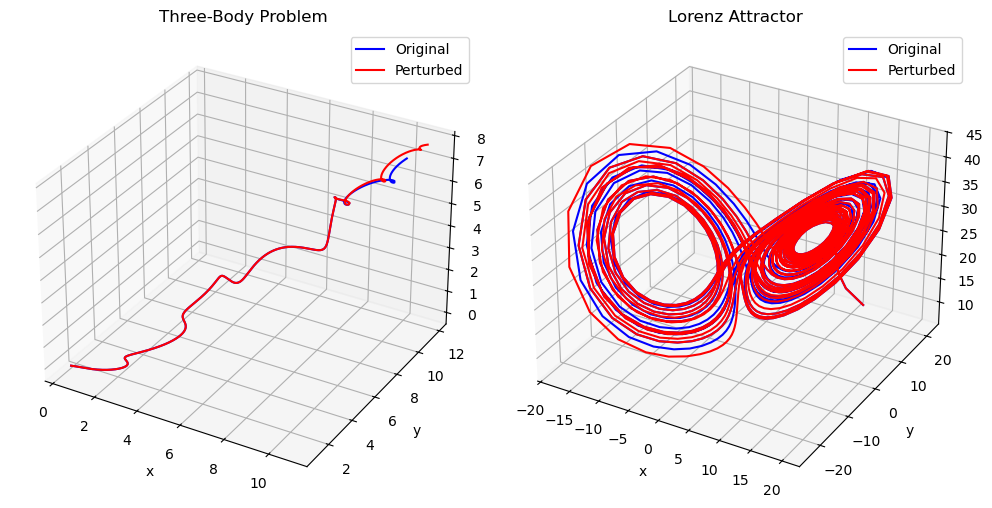

In [856]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(p1x_orig, p1y_orig, p1z_orig, label='Original', color='blue')
ax1.plot(p1x_pert, p1y_pert, p1z_pert, label='Perturbed', color='red')
ax1.set_title('Three-Body Problem')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(lorenz_x_orig, lorenz_y_orig, lorenz_z_orig, label='Original', color='blue')
ax2.plot(lorenz_x_pert, lorenz_y_pert, lorenz_z_pert, label='Perturbed', color='red')
ax2.set_title('Lorenz Attractor')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.legend()

plt.tight_layout()
#plt.savefig(f"Lorenz {mass} and {param}.png" , dpi = 300)
plt.show()

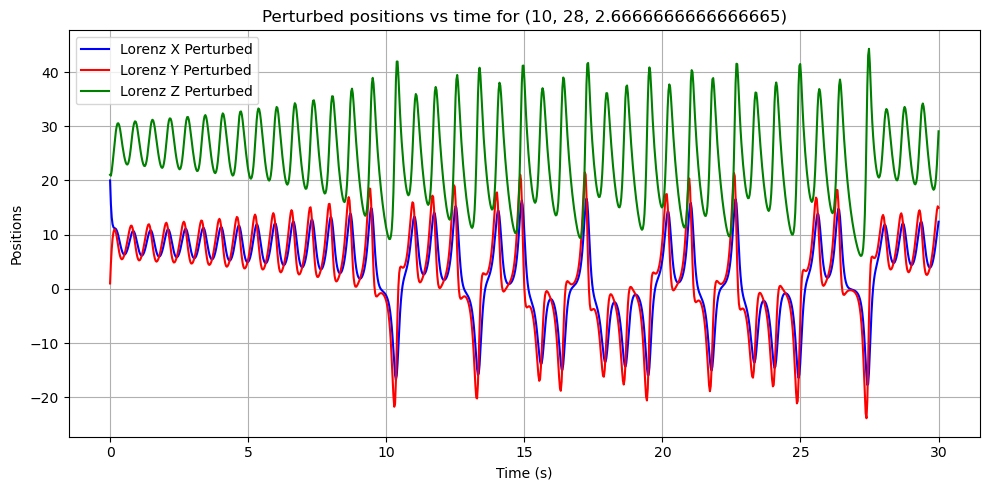

In [857]:
fig = plt.figure(figsize=(10,5))
plt.plot(steps, lorenz_x_pert, c="b", label="Lorenz X Perturbed")
plt.plot(steps, lorenz_y_pert, c="r", label="Lorenz Y Perturbed")
plt.plot(steps, lorenz_z_pert, c="g", label="Lorenz Z Perturbed")
plt.title(f"Perturbed positions vs time for {param}")
plt.xlabel("Time (s)")
plt.ylabel("Positions")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(f"Perturbed positions vs time for {param}.png" , dpi=300)
plt.show()